### Confidence Interval - Difference In Means

Here you will look through the example for the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv("./data/coffee_dataset.csv")
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [2]:
diffs = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    coff_mean = bootsamp[bootsamp["drinks_coffee"] == True]["height"].mean()
    nocoff_mean = bootsamp[bootsamp["drinks_coffee"] == False]["height"].mean()
    diffs.append(coff_mean - nocoff_mean)

np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)
# statistical evidence coffee drinkers are on average taller

(0.10258900080919674, 2.5388333707966284)

(array([  24.,  109.,  546., 1516., 2623., 2826., 1664.,  568.,  106.,
          18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <BarContainer object of 10 artists>)

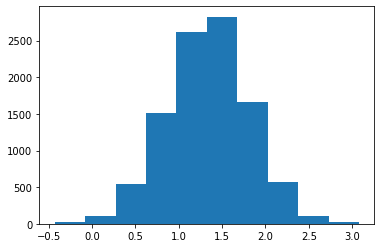

In [5]:
plt.hist(diffs)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [3]:
diffs_age = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    under21_mean = bootsamp[bootsamp["age"] == "<21"]["height"].mean()
    over21_mean = bootsamp[bootsamp["age"] != "<21"]["height"].mean()
    diffs_age.append(over21_mean - under21_mean)

np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)
# statistical evidence that over21 are on average taller

(3.365274945255409, 5.093245067066094)

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [6]:
diffs_coff_under21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    under21_coff_mean = bootsamp.query("age == '<21' and drinks_coffee == True")[
        "height"
    ].mean()
    under21_nocoff_mean = bootsamp.query("age == '<21' and drinks_coffee == False")[
        "height"
    ].mean()
    diffs_coff_under21.append(under21_nocoff_mean - under21_coff_mean)

np.percentile(diffs_coff_under21, 2.5), np.percentile(diffs_coff_under21, 97.5)
# For the under21 group, we have evidence that the non-coffee drinkers are on average taller

(1.0593651244624334, 2.593155794067925)

`4.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.

In [8]:
diffs_coff_over21 = []
for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    over21_coff_mean = bootsamp.query("age != '<21' and drinks_coffee == True")[
        "height"
    ].mean()
    over21_nocoff_mean = bootsamp.query("age != '<21' and drinks_coffee == False")[
        "height"
    ].mean()
    diffs_coff_over21.append(over21_nocoff_mean - over21_coff_mean)

np.percentile(diffs_coff_over21, 2.5), np.percentile(diffs_coff_over21, 97.5)
# For the over21 group, we have evidence that on average the non-coffee drinkers are taller

(1.8281567318141771, 4.40802994243947)

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller.  But, when combined, we saw that on average coffee drinkers were on average taller.  This is again **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers.  So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.  

A larger idea for this is the idea of confounding variables altogether.

In [9]:
(
    full_data.query("age != '<21' and drinks_coffee == False")["height"].mean()
    - full_data.query("age != '<21' and drinks_coffee == True")["height"].mean()
)

1.950935488978871